In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

    modifiying data set into classes format
    images/
    ├── label1/
    │   └── image11    
    │   
    └── label2/
        └── images12      

In [2]:
dataset_path = r'C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset'
df_labels = pd.read_csv(dataset_path+'\\styles.csv')

In [5]:
len(df_labels['masterCategory'].unique()) , len(df_labels['subCategory'].unique()), len(df_labels['articleType'].unique())

(7, 45, 143)

**Creating Master Category classification folder**

In [20]:
files_list = []  
valid_extensions = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')
for item in os.listdir(dataset_path+'/images/'):
    if not os.path.isdir(os.path.join(dataset_path, item)):
        files_list.append(item)

for i in df_labels['masterCategory'].unique():
    sub_df = df_labels[df_labels['masterCategory'] == i]['id']
    for j in sub_df:
        source_dir = dataset_path+f'/images/'
        destination_dir = dataset_path+f'/images/{i.replace(' ','')}'
        os.makedirs(destination_dir, exist_ok=True)
        file_to_copy = f'{j}.jpg'

        source_file = os.path.join(source_dir, file_to_copy)
        destination_file = os.path.join(destination_dir, file_to_copy)

        if os.path.isfile(source_file) and source_file.lower().endswith(valid_extensions):
            shutil.copy(source_file, destination_file)
    print(f"Copied: {i}")

Copied: Apparel
Copied: Accessories
Copied: Footwear
Copied: Personal Care
Copied: Free Items
Copied: Sporting Goods
Copied: Home


In [ ]:
files_list = []  
valid_extensions = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')
for item in os.listdir(dataset_path+'/images/'):
    if not os.path.isdir(os.path.join(dataset_path, item)):
        files_list.append(item)

for i in df_labels['masterCategory'].unique():
    sub_df = df_labels[df_labels['masterCategory'] == i]['id']
    for j in sub_df:
        source_dir = dataset_path+f'/images/'
        destination_dir = dataset_path+f'/images/{i.replace(' ','')}'
        os.makedirs(destination_dir, exist_ok=True)
        file_to_copy = f'{j}.jpg'

        source_file = os.path.join(source_dir, file_to_copy)
        destination_file = os.path.join(destination_dir, file_to_copy)

        if os.path.isfile(source_file) and source_file.lower().endswith(valid_extensions):
            shutil.copy(source_file, destination_file)
    print(f"Copied: {i}")

Copied: Apparel
Copied: Accessories
Copied: Footwear
Copied: Personal Care
Copied: Free Items
Copied: Sporting Goods
Copied: Home


In [ ]:
def delete_files_from_folder(folder_path):
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        
        if os.path.isfile(item_path):
            os.remove(item_path) 
            print(f"Deleted file: {item_path}")

delete_files_from_folder(dataset_path+'/images/')

shutil.rmtree(dataset_path+'/images/Home')
print(f'Successfully deleted the folder: {dataset_path+'/images/Home'}')

In [ ]:
folder_A = r"C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset\images\FreeItems/"
folder_B = r"C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset\images\SportingGoods/"
combined_folder = r"C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset\images\FreeItems_SportingGoods/"

if not os.path.exists(combined_folder):
    os.makedirs(combined_folder)

for file_name in os.listdir(folder_A):
    source = os.path.join(folder_A, file_name)
    destination = os.path.join(combined_folder, file_name)
    shutil.copy2(source, destination)

for file_name in os.listdir(folder_B):
    source = os.path.join(folder_B, file_name)
    destination = os.path.join(combined_folder, file_name)
    shutil.copy2(source, destination)

shutil.rmtree(folder_A)
shutil.rmtree(folder_B)

print("Folders combined successfully!")

**Creating Sub Category classification folder**

In [22]:
files_list = []  
valid_extensions = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')
for item in os.listdir(dataset_path+'/image_2/'):
    if not os.path.isdir(os.path.join(dataset_path, item)):
        files_list.append(item)

for i in df_labels['subCategory'].unique():
    sub_df = df_labels[df_labels['subCategory'] == i]['id']
    for j in sub_df:
        source_dir = dataset_path+f'/image_2/'
        destination_dir = dataset_path+f'/image_2/{i.replace(' ','')}'
        os.makedirs(destination_dir, exist_ok=True)
        file_to_copy = f'{j}.jpg'

        source_file = os.path.join(source_dir, file_to_copy)
        destination_file = os.path.join(destination_dir, file_to_copy)

        if os.path.isfile(source_file) and source_file.lower().endswith(valid_extensions):
            shutil.copy(source_file, destination_file)
    print(f"Copied: {i}")

Copied: Topwear
Copied: Bottomwear
Copied: Watches
Copied: Socks
Copied: Shoes
Copied: Belts
Copied: Flip Flops
Copied: Bags
Copied: Innerwear
Copied: Sandal
Copied: Shoe Accessories
Copied: Fragrance
Copied: Jewellery
Copied: Lips
Copied: Saree
Copied: Eyewear
Copied: Nails
Copied: Scarves
Copied: Dress
Copied: Loungewear and Nightwear
Copied: Wallets
Copied: Apparel Set
Copied: Headwear
Copied: Mufflers
Copied: Skin Care
Copied: Makeup
Copied: Free Gifts
Copied: Ties
Copied: Accessories
Copied: Skin
Copied: Beauty Accessories
Copied: Water Bottle
Copied: Eyes
Copied: Bath and Body
Copied: Gloves
Copied: Sports Accessories
Copied: Cufflinks
Copied: Sports Equipment
Copied: Stoles
Copied: Hair
Copied: Perfumes
Copied: Home Furnishing
Copied: Umbrellas
Copied: Wristbands
Copied: Vouchers


In [23]:
def delete_files_from_folder(folder_path):
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        
        if os.path.isfile(item_path):
            os.remove(item_path) 
            print(f"Deleted file: {item_path}")

delete_files_from_folder(dataset_path+'/image_2/')

Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10000.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10001.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10002.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10003.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10004.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10005.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10006.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10007.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10008.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10009.jpg
Deleted file: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/10010.jpg

In [7]:
shutil.rmtree(dataset_path+'/image_2/Vouchers')
shutil.rmtree(dataset_path+'/image_2/HomeFurnishing')
print(f'Successfully deleted the folder: {dataset_path+'/image_2/Vouchers'}')

Successfully deleted the folder: C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset/image_2/Vouchers


**Loading Dataset**

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm
dataset_path = r'C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset'

In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),                   
    transforms.Grayscale(num_output_channels=1),     
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
    transforms.RandomHorizontalFlip(0.2),                                
    transforms.RandomRotation(10),                   
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 1.0)), 
    transforms.ToTensor(),                       
])

dataset = datasets.ImageFolder(root=dataset_path+'/images/', transform=transform)

train_size = int(0.8 * len(dataset))  
test_size = len(dataset) - train_size  
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 78
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=16)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,num_workers=16) 

In [4]:
import pickle
with open('test_dataset.pkl', 'wb') as file:
    pickle.dump(test_dataset, file)

torch.Size([400, 1, 128, 128])


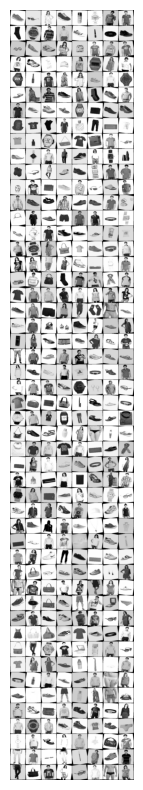

tensor([2, 0, 1, 2, 4, 0, 1, 1, 0, 0, 1, 1, 2, 4, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1,
        1, 2, 4, 0, 1, 0, 1, 1, 0, 4, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1,
        1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 4, 1, 0, 1, 1, 4, 0, 0, 1, 0, 1, 0,
        2, 0, 1, 1, 2, 1, 3, 4, 0, 0, 1, 2, 2, 0, 1, 1, 4, 1, 0, 2, 1, 0, 2, 1,
        1, 2, 0, 1, 2, 2, 1, 4, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 4, 1,
        1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 3, 0, 1, 0, 1, 0, 0, 1, 1, 3, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1,
        4, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1,
        1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 4, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1,
        0, 2, 2, 4, 1, 1, 4, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1,
        1, 4, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1,
        1, 2, 1, 1, 2, 0, 2, 4, 0, 2, 1, 1, 2, 1, 2, 4, 1, 1, 2, 1, 2, 0, 2, 2,
        1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0,

In [5]:
def imshow(img): 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  
    plt.show()

for images, labels in train_loader:
    print(images.shape) 

    plt.figure(figsize=(10,10))  
    imshow(torchvision.utils.make_grid(images))
    
    print(labels) 
    break  

**Classifiying master catogory**

In [19]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        self.conv11 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)  
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv12 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.conv13 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)

        self.fc1 = nn.Linear(128 * 14 * 14, 400)  
        self.fc2 = nn.Linear(400, num_classes) 

    def forward(self, x):
        x = self.conv11(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv12(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv13(x)
        x = F.relu(x)
        x = self.pool(x)

        # print("Shape before flattening:", x.shape)

        x = x.view(x.shape[0], -1)  
        
        x = self.fc1(x)  
        x = F.relu(x)
        
        x = self.fc2(x)  
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 5 
model = SimpleCNN(num_classes).to(device)  


Shape before flattening: torch.Size([16, 128, 18, 18])
Output size: torch.Size([16, 5])


In [10]:
num_classes = len(dataset.classes)  
model = SimpleCNN(num_classes).to(device) 

criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1  
for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device) 
        optimizer.zero_grad()  
        
        outputs = model(images) 
        loss = criterion(outputs, labels)  
        
        loss.backward()  
        optimizer.step()  
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")

Epoch 1/1: 100%|██████████| 89/89 [02:12<00:00,  1.48s/batch] 

Epoch [1/1], Loss: 0.4931
Training complete!


**Complex model**

In [4]:
class SimpleCNN(nn.Module): # v2
    def __init__(self, cnn_count,cnn_arch_list):
        super(SimpleCNN, self).__init__()

        in_channels = 1
        out_channels = 32
        for i in range(cnn_count):
            setattr(self, f'conv{i+1}', nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=0))
            in_channels = out_channels
            out_channels = int(in_channels*1.5)
        
        self.arch_list = cnn_arch_list
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
    def forward(self, x):
        cnn_index = 0
        for v in self.arch_list:
            if v =='c':
                x = getattr(self, f'conv{cnn_index + 1}')(x)
                cnn_index += 1
            elif v == 'r':
                x = F.relu(x)
            elif v == 'p':
                x = self.pool(x)
        return x

class Main_CNN(nn.Module):
    def __init__(self,num_classes):
        super(Main_CNN, self).__init__()
        self.cnn1 = SimpleCNN(3,['c','r','p','c','r','p','c','r','p'])  
        self.cnn2 = SimpleCNN(3,['c','r','p','c','r','p','c','r','p'])  
        # self.cnn3 = SimpleCNN(3,['c','r','p','c','r','p','c','r','p'])  
        self.fc1 = nn.Linear(9408*3, 400) # 400, 14112
        self.fc2 = nn.Linear(400, num_classes) 


    def forward(self, x):
        out1 = self.cnn1.forward(x)
        out2 = self.cnn2.forward(x)
        # out3 = self.cnn3.forward(x)

        out1_flat = out1.view(out1.size(0), -1)  
        out2_flat = out2.view(out2.size(0), -1)
        # out3_flat = out3.view(out3.size(0), -1)
        
        combined_output = torch.cat((out1_flat, out2_flat), dim=1) #

        # print('comb_out:',combined_output.shape)

        out = self.fc1(combined_output)  
        out = F.relu(out)        
        out = self.fc2(out)  

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Main_CNN(5).to(device)

In [5]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10  
for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device) 
        optimizer.zero_grad()  
        
        outputs = model(images) 
        loss = criterion(outputs, labels)  
        
        loss.backward()  
        optimizer.step()  
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")

Epoch 1/1: 100%|██████████| 456/456 [02:07<00:00,  3.59batch/s]

Epoch [1/1], Loss: 0.3024
Training complete!


In [ ]:
# using mixed floating point precision.
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

scaler = GradScaler('cuda')

num_epochs = 10  
for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device) 
        optimizer.zero_grad()  
        
        with autocast('cuda'):
            outputs = model(images) 
            loss = criterion(outputs, labels)  
        
        scaler.scale(loss).backward()  
        scaler.step(optimizer)
        scaler.update() 
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")


**Evaluating**

In [17]:
model.eval()

correct = 0
total = 0
running_loss = 0.0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        loss = F.cross_entropy(outputs, labels)
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total
average_loss = running_loss / len(test_loader)
conf_matrix = confusion_matrix(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Test Cross-Entropy Loss: {average_loss:.4f}')
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 98.38%
Test Cross-Entropy Loss: 0.0672
Confusion Matrix:
[[2215   31   16    2   12]
 [  18 4229    5    1    1]
 [   6    3 1836    0    1]
 [  12    7    1    3    1]
 [  18    7    2    0  461]]


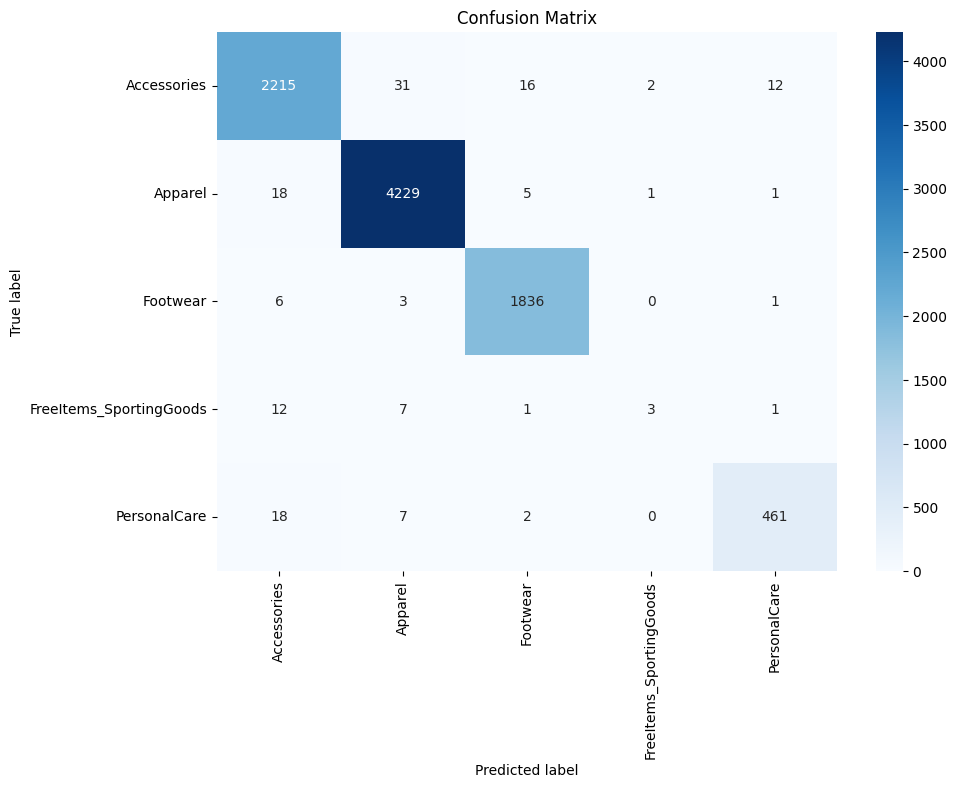

In [18]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

class_names = dataset.classes
plot_confusion_matrix(conf_matrix, class_names)

**Classifiying subcatogory**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm
dataset_path = r'C:\Users\noobj\OneDrive\Documents\Datasets\fashion-dataset'

In [7]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),                   
    transforms.Grayscale(num_output_channels=1),     
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
    transforms.RandomHorizontalFlip(0.2),                                
    transforms.RandomRotation(10),                   
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 1.0)), 
    transforms.ToTensor(),                       
])

dataset = datasets.ImageFolder(root=dataset_path+'/image_2/', transform=transform)

train_size = int(0.8 * len(dataset))  
test_size = len(dataset) - train_size  
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 78
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=16)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,num_workers=16)

In [9]:
class SimpleCNN(nn.Module): 
    def __init__(self, cnn_count,pool_count,cnn_channel_list,pool_size_list,cnn_arch_list):
        super(SimpleCNN, self).__init__()

        in_channels = 1
        for i in range(cnn_count):
            setattr(self, f'conv{i+1}', nn.Conv2d(in_channels=in_channels, out_channels=cnn_channel_list[i], kernel_size=3, stride=1, padding=0))
            in_channels = cnn_channel_list[i]
        
        self.arch_list = cnn_arch_list
        for i in range(pool_count):
            setattr(self, f'pool{i+1}', nn.MaxPool2d(kernel_size=pool_size_list[i], stride=pool_size_list[i], padding=0))
        
    def forward(self, x):
        cnn_index = 0
        pool_index = 0
        for v in self.arch_list:
            if v =='c':
                x = getattr(self, f'conv{cnn_index + 1}')(x)
                cnn_index += 1
            elif v == 'r':
                x = F.relu(x)
            elif v == 'p':
                x = getattr(self, f'pool{pool_index + 1}')(x)
                pool_index += 1
        return x

class Main_CNN(nn.Module):
    def __init__(self,num_classes):
        super(Main_CNN, self).__init__()
        self.cnn1 = SimpleCNN(2,2,[60,20],[5,5],['c','r','c','r','p','p'])  
        self.cnn2 = SimpleCNN(4,4,[60,20,15,10],[2,2,2,3],['c','p','c','r','p','c','p','c','p'])  
        self.cnn3 = SimpleCNN(3,3,[60,10,10],[3,3,3],['c','r','c','p','c','r','p','p'])  
        self.cnn4 = SimpleCNN(3,3,[60,10,10],[3,3,3],['c','p','c','r','c','r','p','p']) 
        self.cnn5 = SimpleCNN(6,4,[60,40,40,15,10,20],[2,2,2,3],['c','r','c','p','c','r','p','c','r','p','c','r','c','r','p'])  
        self.fc1 = nn.Linear(320+160*3+180, 100)  # torch.Size([78, 320]) torch.Size([78, 160]) torch.Size([78, 160]) torch.Size([78, 160]) torch.Size([78, 180])
        self.fc2 = nn.Linear(100, 25) 
        self.fc3 = nn.Linear(25, num_classes)  


    def forward(self, x):
        out1 = self.cnn1.forward(x)
        out2 = self.cnn2.forward(x)
        out3 = self.cnn3.forward(x)
        out4 = self.cnn4.forward(x)
        out5 = self.cnn5.forward(x)

        out1_flat = out1.view(out1.size(0), -1)  
        out2_flat = out2.view(out2.size(0), -1)
        out3_flat = out3.view(out3.size(0), -1)
        out4_flat = out4.view(out4.size(0), -1)
        out5_flat = out5.view(out5.size(0), -1)
        # print('comb_out:',out1_flat.shape, out2_flat.shape, out3_flat.shape, out4_flat.shape, out5_flat.shape)
        combined_output = torch.cat((out1_flat, out2_flat, out3_flat, out4_flat,out5_flat), dim=1)

        # print('comb_out:',combined_output.shape)

        out = self.fc1(combined_output)  
        out = F.relu(out)        
        out = self.fc2(out)  
        out = F.relu(out)  
        out = self.fc3(out)

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Main_CNN(43).to(device)

In [10]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device) 
        optimizer.zero_grad()  
        
        outputs = model(images) 
        loss = criterion(outputs, labels)  
        
        loss.backward()  
        optimizer.step()  
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")  # 0.3 loss

Epoch 1/10: 100%|██████████| 456/456 [02:10<00:00,  3.50batch/s]


Epoch [1/10], Loss: 1.2542


Epoch 2/10: 100%|██████████| 456/456 [02:11<00:00,  3.48batch/s]


Epoch [2/10], Loss: 0.5952


Epoch 3/10: 100%|██████████| 456/456 [02:32<00:00,  3.00batch/s]


Epoch [3/10], Loss: 0.4913


Epoch 4/10: 100%|██████████| 456/456 [02:36<00:00,  2.92batch/s]


Epoch [4/10], Loss: 0.4289


Epoch 5/10: 100%|██████████| 456/456 [02:32<00:00,  3.00batch/s]


Epoch [5/10], Loss: 0.3876


Epoch 6/10: 100%|██████████| 456/456 [02:35<00:00,  2.93batch/s]


Epoch [6/10], Loss: 0.3558


Epoch 7/10: 100%|██████████| 456/456 [02:34<00:00,  2.94batch/s]


Epoch [7/10], Loss: 0.3282


Epoch 8/10: 100%|██████████| 456/456 [02:32<00:00,  2.99batch/s]


Epoch [8/10], Loss: 0.3077


Epoch 9/10: 100%|██████████| 456/456 [02:40<00:00,  2.85batch/s]


Epoch [9/10], Loss: 0.2909


Epoch 10/10: 100%|██████████| 456/456 [02:36<00:00,  2.91batch/s]

Epoch [10/10], Loss: 0.2690
Training complete!


**Evaluating model**

In [11]:
model.eval()  

correct = 0
total = 0
running_loss = 0.0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        loss = F.cross_entropy(outputs, labels)
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total  # 89 - 92%
average_loss = running_loss / len(test_loader)
conf_matrix = confusion_matrix(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Test Cross-Entropy Loss: {average_loss:.4f}')
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 90.77%
Test Cross-Entropy Loss: 0.3279
Confusion Matrix:
[[ 24   0   2 ...   0   0   0]
 [  0  11   0 ...   0   0   0]
 [  0   0 558 ...   5   0   0]
 ...
 [  0   0   0 ... 445   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


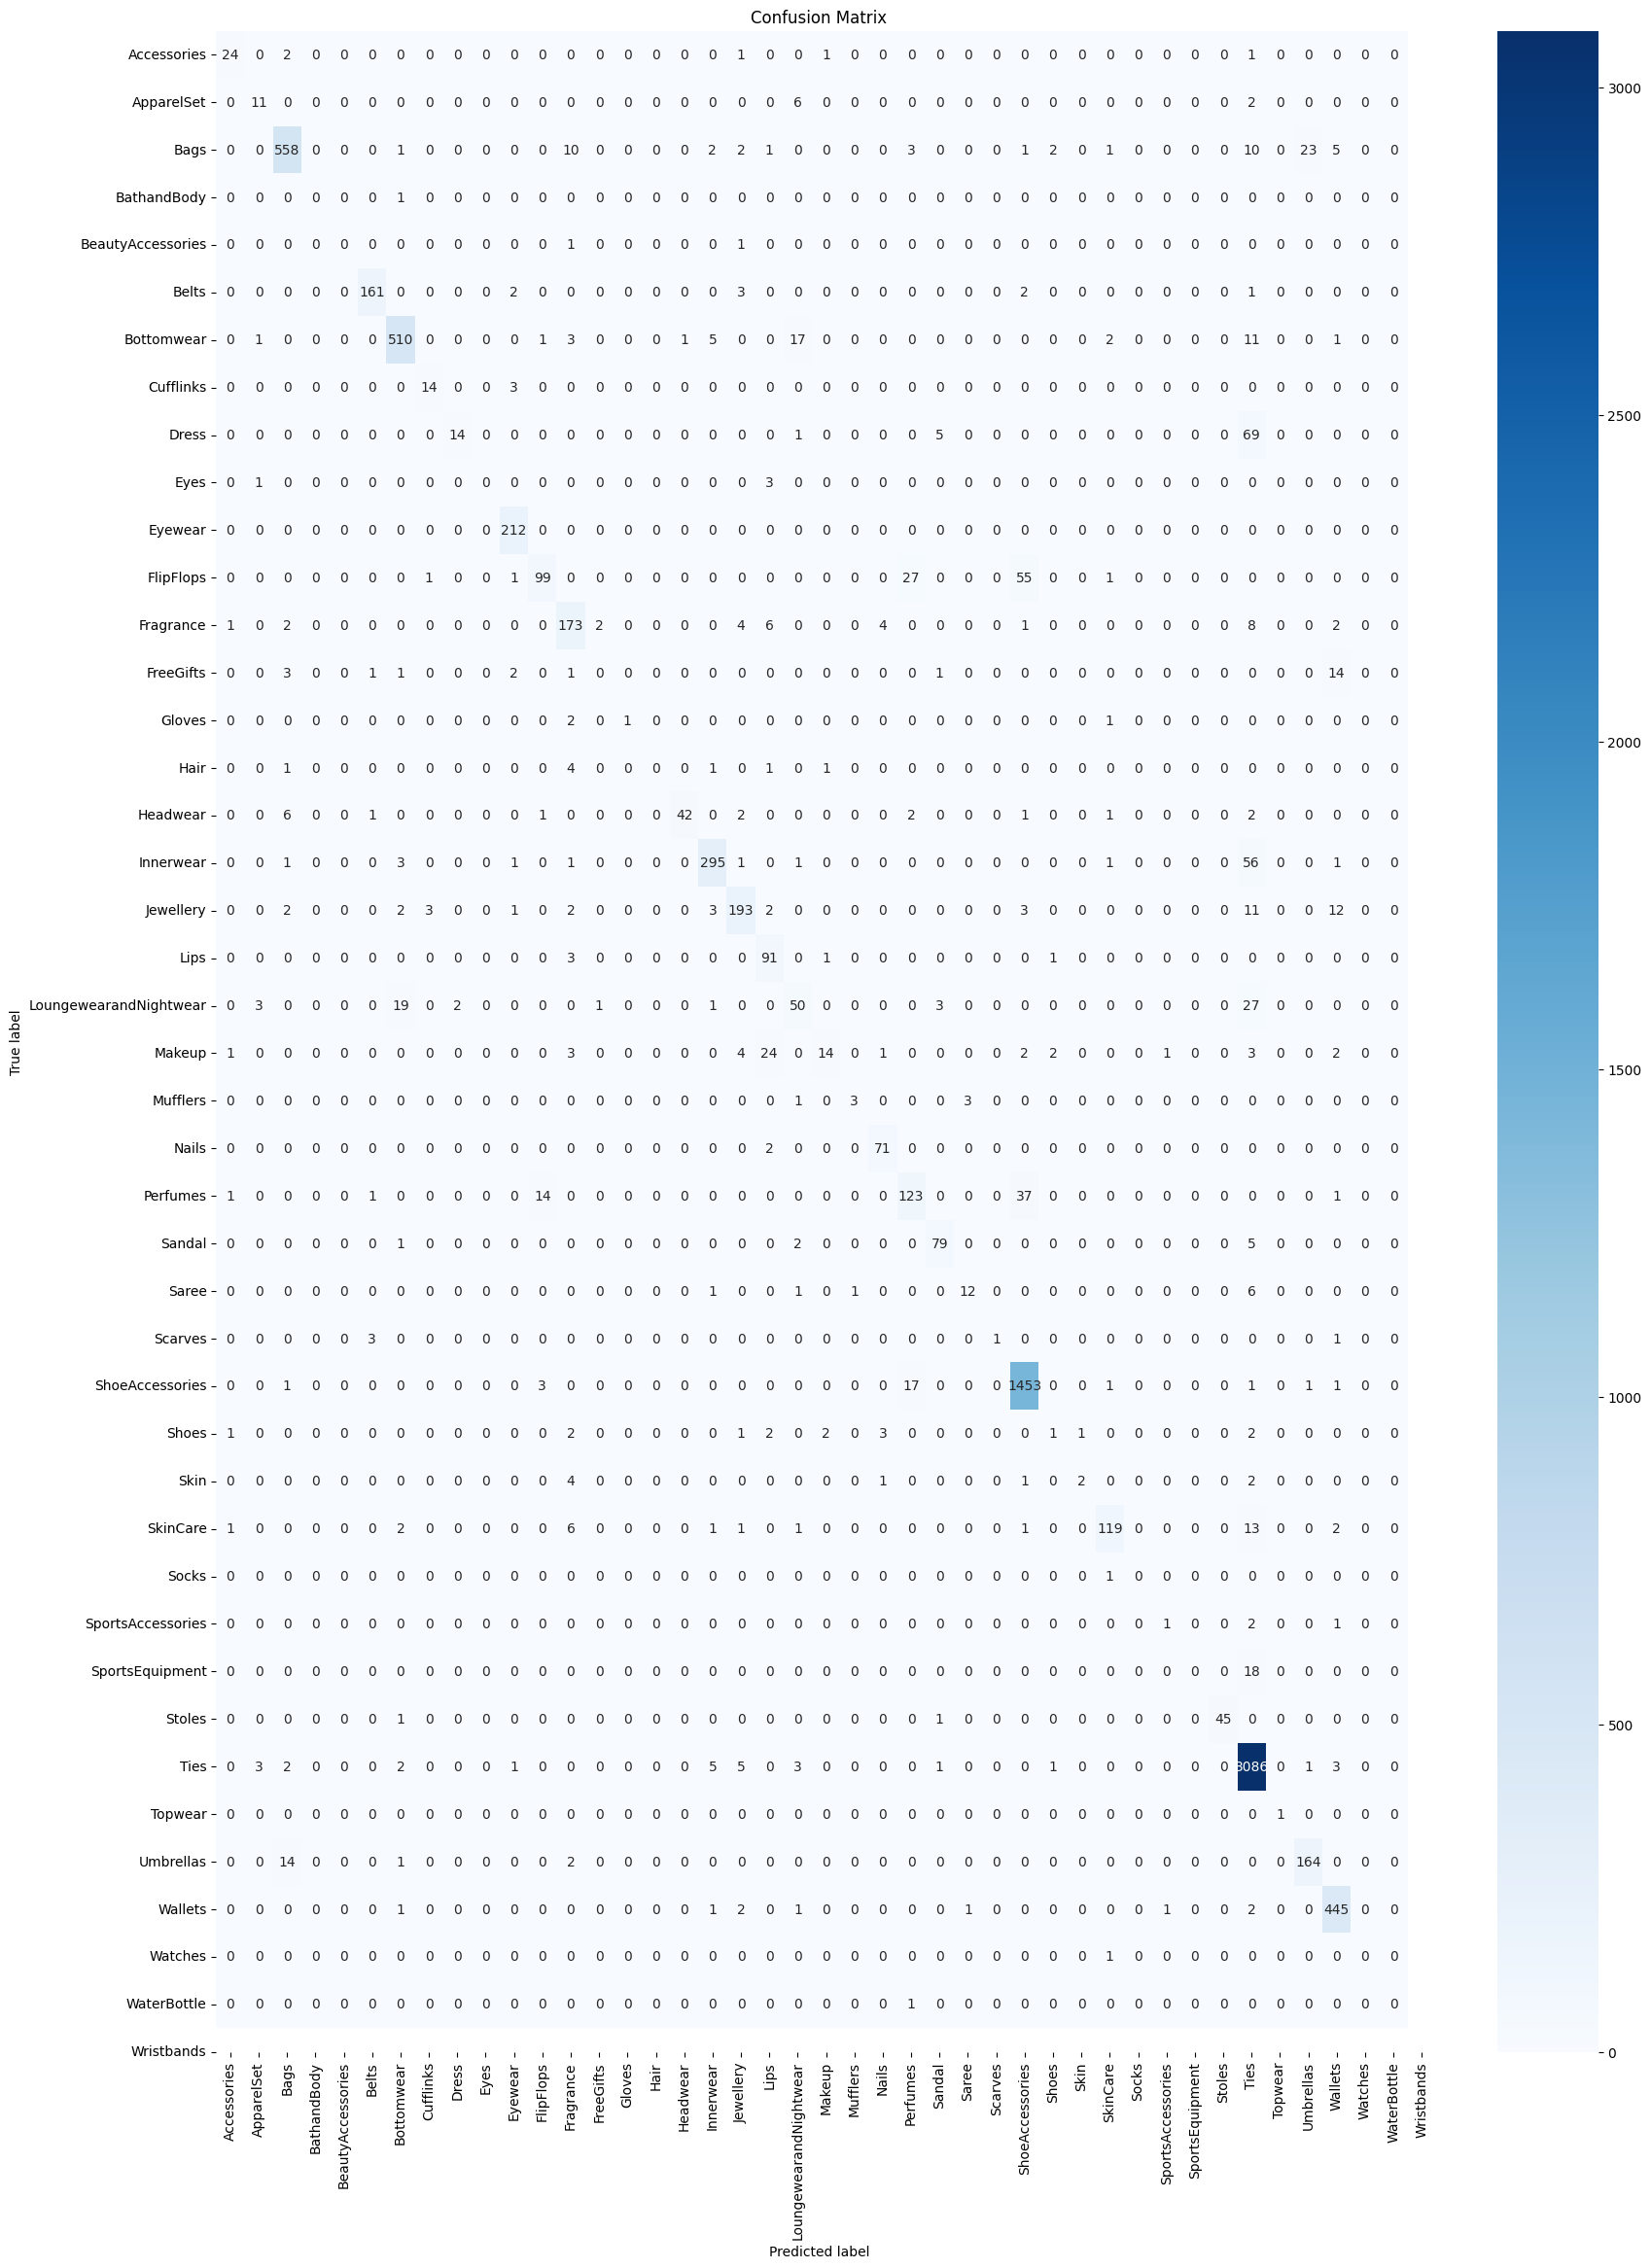

In [12]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(20, 27))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

class_names = dataset.classes
plot_confusion_matrix(conf_matrix, class_names)